## Plotting

In [1]:
from scipy import linalg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from tools.bandh import make_h
sns.set()

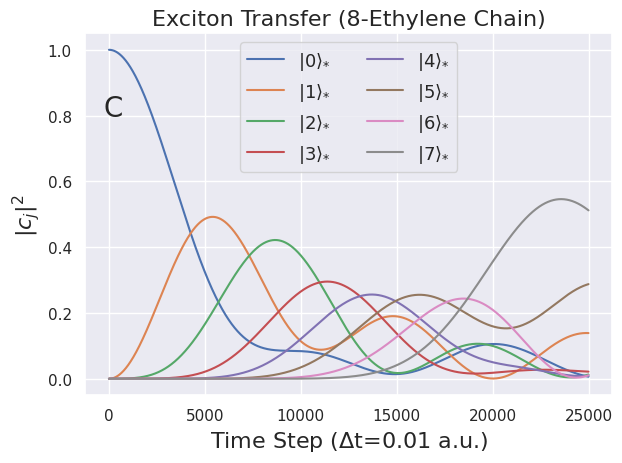

In [2]:
H = np.load("ham-exciton.npy")
idx = np.sort(np.argsort(np.diag(H))[:8+1])
H = H[np.ix_(idx,idx)]
cs = np.load("cs-exciton.npy")
cs2 = cs * cs.conj()
df = pd.DataFrame(cs2[:,1:]) #cut out ground state
for col in df.columns:
    x = df.index
    y = np.real(df[col])
    plt.plot(x,y,label = f"|{col}⟩" + "$_{*}$")
# plt.legend(bbox_to_anchor=(1,1))
fs = 16
plt.legend(loc="upper center",ncols=1,fontsize=9,prop={'size': 13},ncol=2)
plt.xlabel("Time Step ($\Delta$t=0.01 a.u.)",fontsize=fs)
plt.ylabel("$|c_j|^2$",fontsize=fs)
plt.title("Exciton Transfer (8-Ethylene Chain)",fontsize=fs)
plt.annotate("C",(-300,0.8),fontsize=20)
plt.tight_layout()
# plt.savefig("figures/excoeff.png",dpi=500)

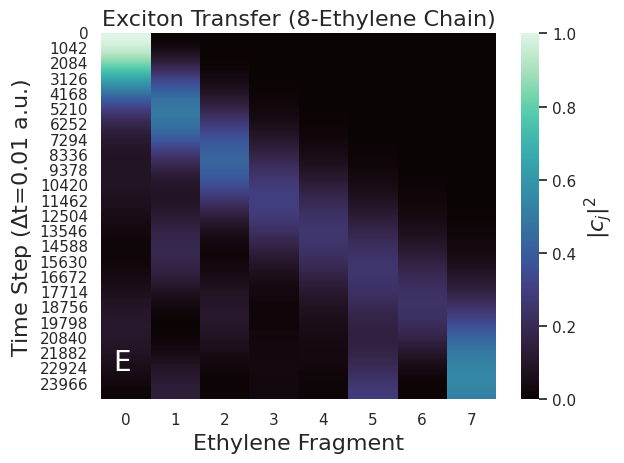

In [3]:
ax = sns.heatmap(np.real(cs[:,1:]*cs[:,1:].conj()),cmap="mako",cbar_kws={'label': '$|c_j|^2$'})
plt.ylabel("Time Step ($\Delta$t=0.01 a.u.)",fontsize=fs)
plt.xlabel("Ethylene Fragment",fontsize=fs)
plt.title("Exciton Transfer (8-Ethylene Chain)",fontsize=fs)
plt.annotate("E",(0.25,23000),fontsize=20,c="white")
ax.figure.axes[-1].yaxis.label.set_size(16)
plt.tight_layout()
# plt.savefig("figures/exmatrix.png",dpi=500)

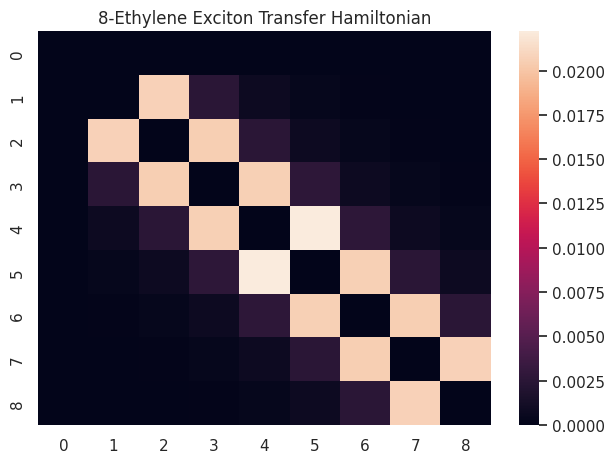

In [4]:
H = np.load("ham-exciton.npy")
idx = np.sort(np.argsort(np.diag(H))[:8+1])
H = H[np.ix_(idx,idx)]
H = H - np.diag(np.diag(H))
sns.heatmap(H)
plt.title("8-Ethylene Exciton Transfer Hamiltonian")
plt.tight_layout()
# plt.savefig("figures/ex_hamiltonian_nodiag.png",dpi=500)

[6.43057127 6.4298551  6.42984064 6.42984602 6.42987088 6.42987088
 6.42984602 6.42984064 6.4298551 ]


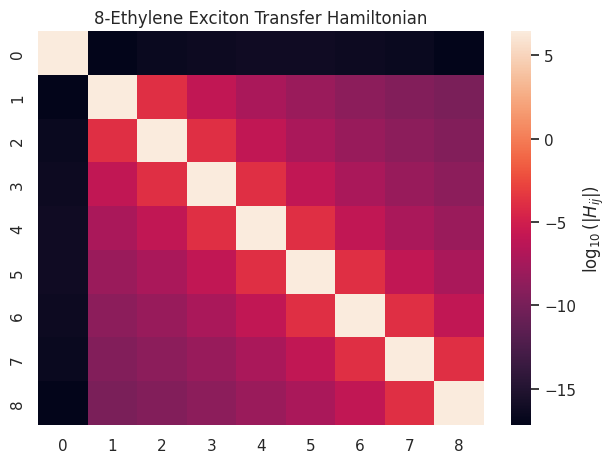

In [5]:
H = np.load("ham-exciton.npy")
idx = np.sort(np.argsort(np.diag(H))[:8+1])
H = H[np.ix_(idx,idx)]
for i in range(H.shape[0]):
    H[i][np.where(H[i] != 0)] = np.log(np.abs(H[i][np.where(H[i] != 0)]))
    H[i][np.where(H[i] == 0)] = -20
print(np.diag(H))
sns.heatmap(H,cbar_kws={'label': "$\log_{10}(|H_{ij}|)$"})
plt.title("8-Ethylene Exciton Transfer Hamiltonian")
plt.tight_layout()
# plt.savefig("figures/ex_hamiltonian_log.png",dpi=500)

Text(0.5, 1.0, 'Ethylene Chain Exciton Band Structure (d=2.5 $\\AA$)')

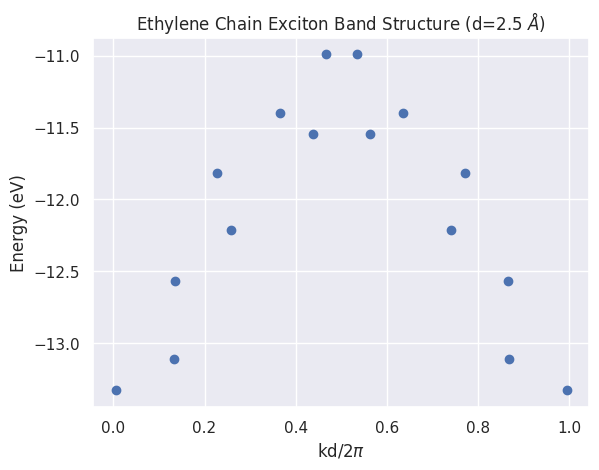

In [6]:
#Exciton Band Structure
def copy_bz(energies,k,sympoint=0.5):
    energies = np.hstack([energies,energies])
    k = np.hstack([k,sympoint - (k-sympoint)]) #reflection around 0.5
    return energies,k

def calc_disp(civecs):
    avgk = []
    for i in range(civecs.shape[1]):
        fft = np.fft.rfft(civecs[:,i]) #fft
        fft = fft / np.linalg.norm(fft) #normalize
        ps = np.abs(fft*np.conj(fft)) #power spectrum
        kdover2pi = np.arange(len(fft))/civecs.shape[0]
        avg = sum(ps * kdover2pi)
        avgk += [avg]
    return np.array(avgk)

# from ../../tools.bandh import calc_disp, copy_bz
# H = make_h(civecs_lassi,energies_lassi,plot=False,prnt=False)
H = np.load("ham-exciton.npy")
gs_e = H[0,0]
idx = np.sort(np.argsort(np.diag(H))[:8+1])
H = H[np.ix_(idx,idx)]
H = H[1:,1:]
energies,civecs = np.linalg.eigh(H)
k = calc_disp(civecs)
energies = gs_e - energies
energies,k = copy_bz(energies,k)
hartree_to_ev = 27.2114
energies *= hartree_to_ev
plt.scatter(k,energies)
plt.ylabel("Energy (eV)")
plt.xlabel("kd/2$\pi$")
plt.title("Ethylene Chain Exciton Band Structure (d=2.5 $\AA$)")
# plt.savefig("figures/ethylene_exciton_band.png",dpi=500)